## Wydobywanie elementów ze zdjęcia - pszczółka 🐝 i przestrzeń barw HSV

Dotychczas poruszaliśmy się wjedynie w przestrzeni barw RGB lub w skali szarości. W tym zadaniu zobaczymy jak można wykorzystać przestrzeń barw HSV do wydobycia interesujących nas elementów ze zdjęcia.

Zadanie polega na dobraniu takiego zakresu barw, aby wyizolować pszczółkę ze zdjęcia.

Wykorzystaj do tego obraz w przestrzeni barw HSV, oraz metody:
- `cv2.inRange()`
- `cv2.bitwise_and()`
- `skimage.measure.label()`
- `skimage.measure.regionprops()`

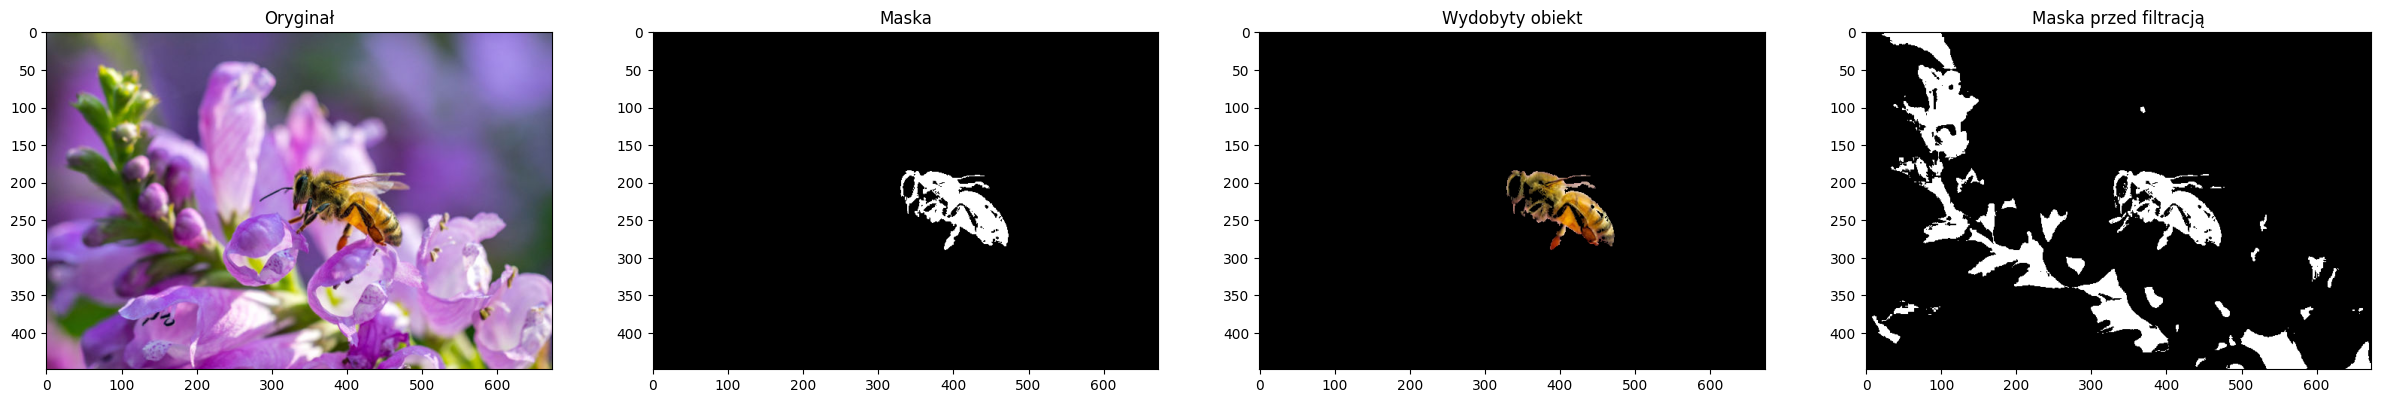

In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure

img = cv2.imread('53.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def extract_max_object(img_rgb: np.ndarray, h_lower: int, h_upper: int) -> np.ndarray:
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, h_lower, h_upper)
    labeled_mask = measure.label(mask)
    regions = measure.regionprops(labeled_mask)
    largest_region = max(regions, key=lambda r: r.area)
    final_mask = np.zeros_like(mask, dtype=np.uint8)
    for coords in largest_region.coords:
        final_mask[coords[0], coords[1]] = 255
    bee_isolated = cv2.bitwise_and(img_rgb, img_rgb, mask=final_mask)
    return bee_isolated, final_mask, mask


h_lower = np.array([0, 46, 64])
h_upper = np.array([43, 255, 255])
#masked, mask, raw_mask = extract_max_object(img, h_lower, h_upper)
masked, mask, raw_mask = extract_max_object(img, h_lower, h_upper)

plt.subplots(1, 4, figsize=(30, 10))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Oryginał')

plt.subplot(1, 4, 2)
plt.imshow(mask, cmap='gray')
plt.title('Maska')

plt.subplot(1, 4, 3)
plt.imshow(masked)
plt.title('Wydobyty obiekt')

plt.subplot(1, 4, 4)
plt.imshow(raw_mask, cmap='gray')
plt.title('Maska przed filtracją')

plt.show()
